# Problem Definition

For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features. Since we need to find the real value, with real calculation, therefore this problem is regression problem. We will be using linear regression to solve this problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


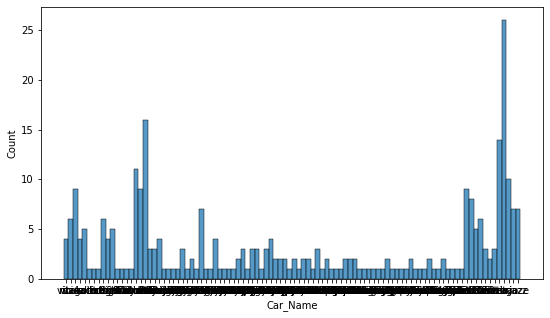

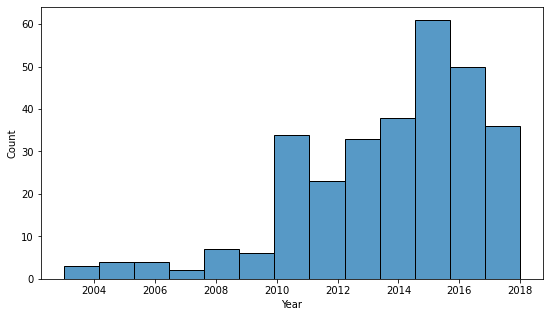

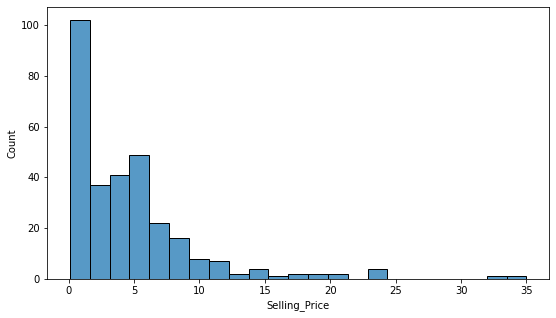

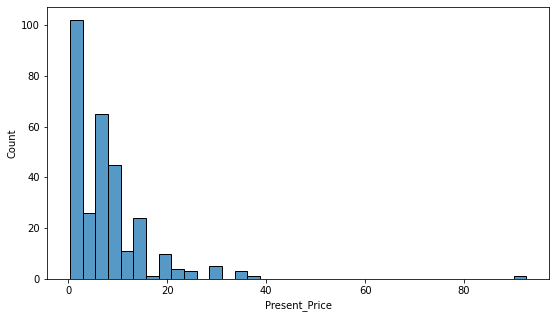

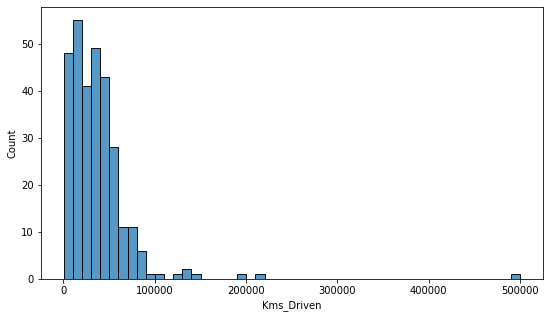

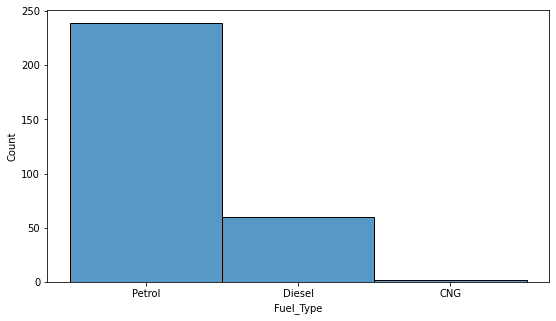

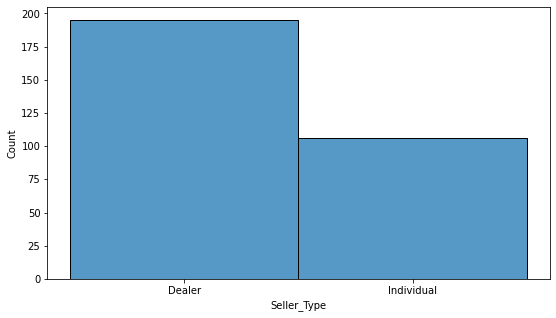

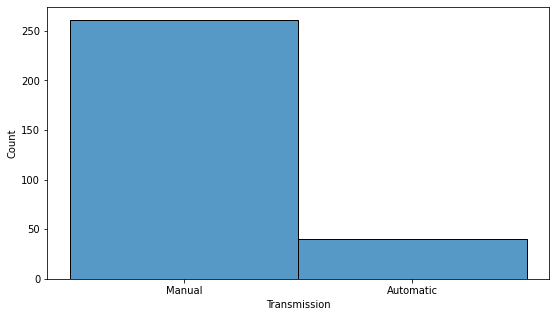

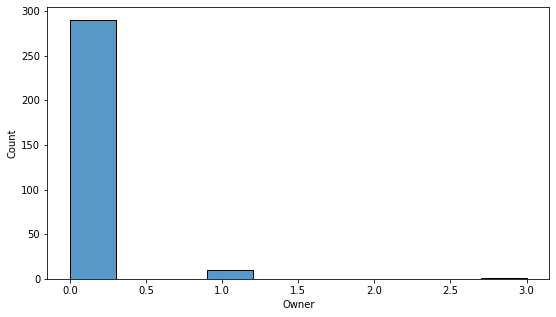

In [7]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

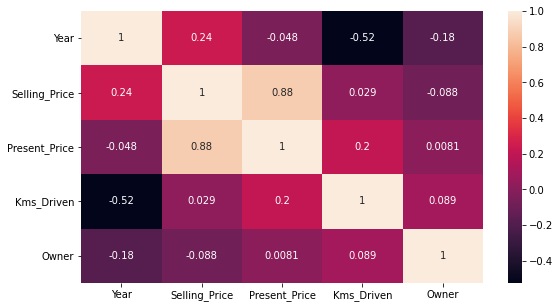

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [10]:
df["vehicle_age"]=2021 - df.Year

In [11]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [12]:
df.drop(columns=["Car_Name", "Year"], inplace = True)

In [13]:
df = pd.get_dummies(df, drop_first = True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.350,5.590,27000,0,7,0,1,0,1
1,4.750,9.540,43000,0,8,1,0,0,1
2,7.250,9.850,6900,0,4,0,1,0,1
3,2.850,4.150,5200,0,10,0,1,0,1
4,4.600,6.870,42450,0,7,1,0,0,1


In [15]:
X = df.drop("Selling_Price", axis=1)
y = df.Selling_Price

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = True).fit(X_train,y_train)

In [18]:
model.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
        2.61924627e+00,  6.06486867e-01, -1.22016745e+00, -1.00868282e+00])

In [22]:
print("Model intercept  : ", model.intercept_, "\n")

for i in range(len(X.columns)):
    
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  4.604429051576997 

Present_Price :  0.445257969897629
Kms_Driven :  -1.8706729757021776e-05
Owner :  -0.8135775776586713
vehicle_age :  -0.31904776455888667
Fuel_Type_Diesel :  2.6192462729450976
Fuel_Type_Petrol :  0.6064868667913238
Seller_Type_Individual :  -1.2201674460429688
Transmission_Manual :  -1.0086828216162669


In [20]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Present_Price,0.445
Kms_Driven,-0.000
Owner,-0.814
vehicle_age,-0.319
Fuel_Type_Diesel,2.619
Fuel_Type_Petrol,0.606
Seller_Type_Individual,-1.220
Transmission_Manual,-1.009


In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([10.70729552, 10.87520713,  4.43096899,  5.91337788,  2.54941855,
        9.03674575,  7.2737809 ,  1.49360032, 16.02286635,  4.74188631,
        6.7140433 ,  6.40320371,  3.4644454 ,  3.4148824 , -0.60954639,
        4.17855023,  9.09429896, -0.30209302,  9.1878139 ,  1.18733586,
        7.5000935 , 18.19046601, 19.54269265,  0.21434982,  2.15321632,
        4.76671337,  4.95716413,  6.82822836,  5.23694236,  5.48340774,
        4.36427226,  7.93602233,  5.74539229, -0.54343788,  0.66628503,
        7.00623246,  7.3790224 ,  5.4235689 ,  1.17465734,  1.16263268,
        2.06339611,  5.1531104 , 14.03667284, -9.2787032 ,  1.39494051,
        3.97812269, -0.91681301,  8.44163201,  4.34565296,  4.84278586,
        5.18366168, 16.39104119,  0.85271469,  1.65187499,  1.6335204 ,
       -1.42292807,  2.85945813,  0.66521417, -1.75047375,  1.6120861 ,
        0.6862596 ])

In [26]:
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
mae = mean_absolute_error(y_test,y_pred)
R2_score = r2_score(y_test,y_pred)

In [27]:
print("Model testing performance:")
print("--------------------------")
print('RMSE is {:28}'.format(rmse))
print("MAE is {:30}".format(mae))
print('R2 score is {:25}'.format(R2_score))

Model testing performance:
--------------------------
RMSE is            1.946054013887482
MAE is             1.1811769157076817
R2 score is        0.8589039971923135


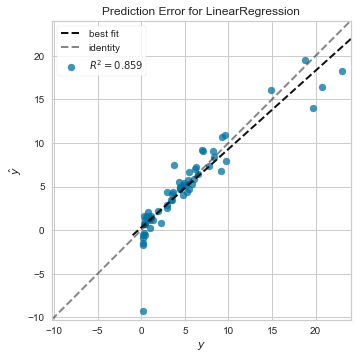

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [28]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [29]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

result_sample = results.head(25)
result_sample

,Actual,Predicted
67,9.250,10.707
99,9.650,10.875
266,3.650,4.431
222,6.000,5.913
24,2.900,2.549
282,8.250,9.037
279,6.250,7.274
138,0.600,1.494
50,14.900,16.023
234,5.500,4.742


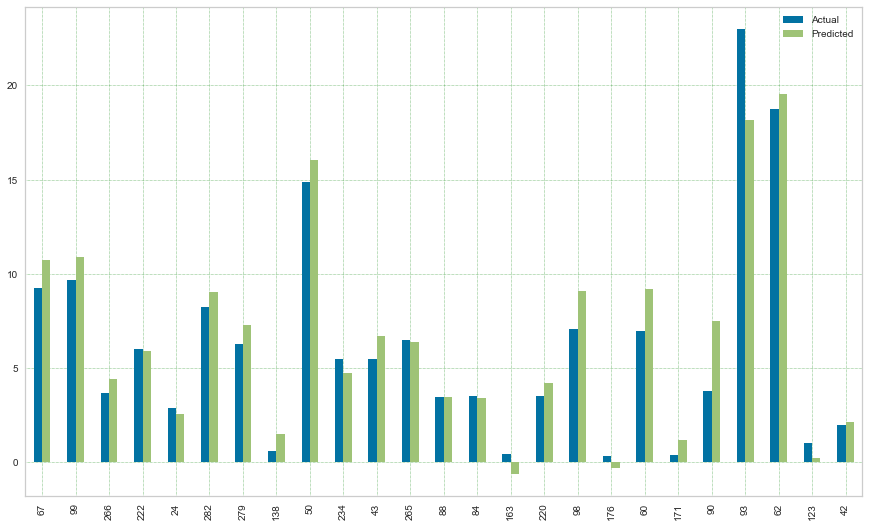

In [30]:
result_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

In [31]:
def show_metrics(y_test, y_pred):
    rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print("Model testing performance:")
    print("--------------------------")
    print('RMSE is {:29}'.format(rmse))
    print("MAE is {:30}".format(mae))
    print('R2 score is {:26}'.format(R2_score))

In [32]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
X_train

array([[0.07780668, 0.28566118, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.14390984, 0.13516706, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.15680537, 0.20251765, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.01246207, 0.12      , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00270915, 0.25647059, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.07379714, 0.05637176, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [35]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [36]:
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.9026594573849416
MAE is              1.185425017189817
R2 score is         0.8651263662232392


In [37]:
ridge_model.alpha

1.0

In [38]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [39]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [40]:
ridgecv.alpha_

0.1

In [41]:
alpha_space = np.linspace(0.01, 10, 100)  # we are more focusing on 0.1 by reducing the first parameter.
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10)

In [42]:
ridgecv.alpha_

0.21181818181818182

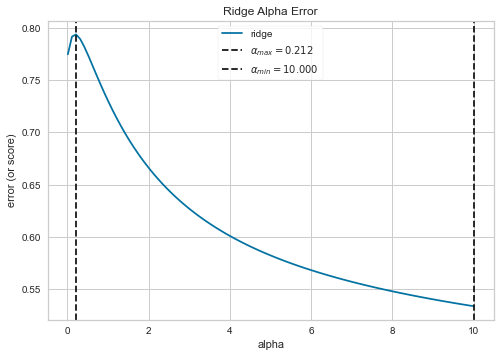

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [43]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against

alpha_space = np.linspace(0.01, 10, 100)

# Instantiate the visualizer

visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [44]:
y_pred=ridgecv.predict(X_test)

In [45]:
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.8181292744462774
MAE is             1.1382510736753337
R2 score is         0.8768443191837143


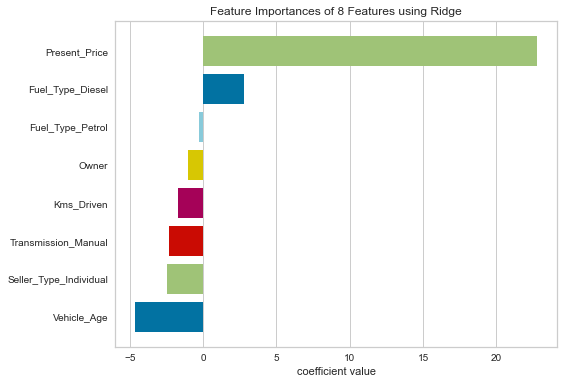

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='coefficient value'>

In [46]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [47]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [48]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is             4.844430603529284
MAE is              3.198316612453815
R2 score is        0.12563974476813833


In [49]:
alpha_space = np.linspace(0.001, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [50]:
y_pred=lasso_cv_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.9323214066935652
MAE is             1.1726681712627105
R2 score is         0.8608882992084926


In [51]:
lasso_cv_model.alpha_

0.001

In [52]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [53]:
def evaluate_model(Model, lambdas):
    training_errors = [] 
    testing_errors = [] 
    for l in lambdas:

        model = Model(alpha=l) 
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

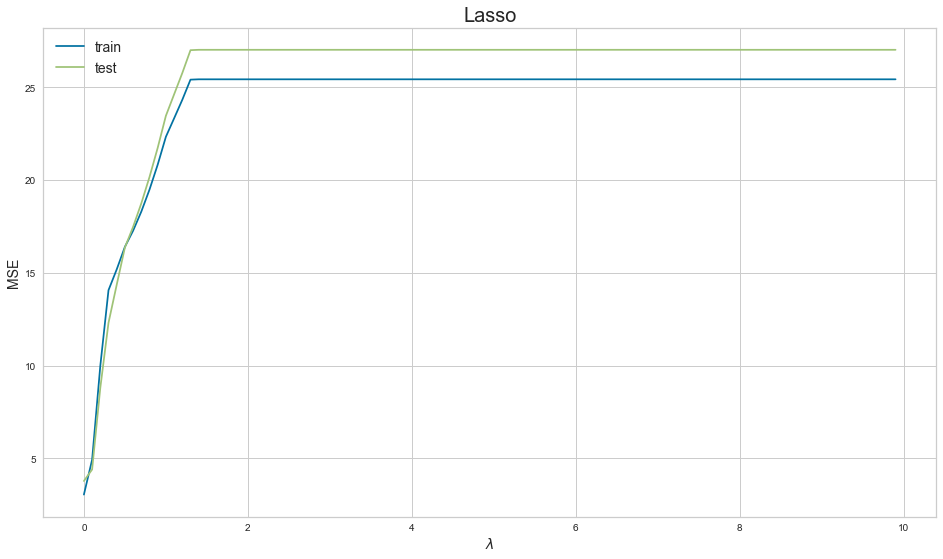

In [54]:
lambdas = np.arange(0, 10, step=0.1)
lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")